<a href="https://colab.research.google.com/github/HelmieAnalytics/xardata/blob/main/XarData_v3.0.0_ranker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Delete files in directories

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import os

# Specify the desired directory path
directory_path = "/content/drive/MyDrive"

# Change the current working directory
os.chdir(directory_path)

# Verify that the working directory has been updated
print("Current working directory:", os.getcwd())

Current working directory: /content/drive/MyDrive


In [ ]:

import os
import glob

# Base directory containing the folders
base_dir = '/content/drive/MyDrive/'
exclude_subdir = ''  # Name of the subdirectory to exclude

# Find all subdirectories within the base directory
subdirs = [d for d in glob.glob(os.path.join(base_dir, '*')) if os.path.isdir(d)]

# Iterate over each subdirectory and delete all files within them, except the excluded subdirectory
for subdir in subdirs:
    if os.path.basename(subdir) == exclude_subdir:
        continue  # Skip the excluded subdirectory
    files = glob.glob(os.path.join(subdir, '*'))  # Get all files in the subdirectory
    for file in files:
        try:
            os.remove(file)  # Delete the file
            print(f"Deleted {file}")
        except Exception as e:
            print(f"Error deleting {file}: {e}")

In [ ]:

import shutil
import os

def delete_folder(folder_path):
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)
        print(f"Deleted folder: {folder_path}")
    else:
        print(f"Folder not found: {folder_path}")

# Example usage
folder_path = '/content/Stocks'
delete_folder(folder_path)

Deleted folder: /content/Stocks


In [ ]:

import os

def delete_files_except_specific(directory, excluded_files, excluded_folders):
    """
    Deletes all files in the specified directory except for the ones listed in `excluded_files`.
    Args:
        directory (str): Path to the directory.
        excluded_files (list): List of filenames to exclude.
        excluded_folders (list): List of folder names to exclude.
    """
    for root, dirs, files in os.walk(directory):
        # Exclude specific folders
        dirs[:] = [d for d in dirs if d not in excluded_folders]

        for filename in files:
            if filename not in excluded_files:
                file_path = os.path.join(root, filename)
                os.remove(file_path)

# Example usage:
folder_path = '/content/drive/MyDrive'
files_to_exclude = []  # Add filenames you want to exclude
folders_to_exclude = []  # Add folder names you want to exclude
delete_files_except_specific(folder_path, files_to_exclude, folders_to_exclude)

In [ ]:

from PIL import Image

def convert_to_bitmap(input_image_path, output_image_path, new_size, dpi):
    # Open the image file
    with Image.open(input_image_path) as img:
        # Resize the image while maintaining aspect ratio
        img.thumbnail(new_size, Image.ANTIALIAS)

        # Set DPI
        img.info['dpi'] = (dpi, dpi)

        # Convert image to '1' mode for a bitmap (binary) image
        img = img.convert('1')

        # Save the image in bitmap format
        img.save(output_image_path, format='BMP', dpi=(dpi, dpi))
        print(f"Image saved as {output_image_path}")

# Example usage
input_path = "/content/Screenshot_20220923_182855.jpg"  # Replace with your input image file path
output_path = "helmie_research_bitmap.bmp"  # Replace with your desired output file path
size = (200, 200)  # Set the desired size (width, height) for resizing
dpi = 300  # Desired DPI for the output

convert_to_bitmap(input_path, output_path, size, dpi)

Image saved as helmie_research_bitmap.bmp


<ipython-input-55-a0cdd3f1a866>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(new_size, Image.ANTIALIAS)


###Install packages

In [3]:
!pip install yfinance

In [4]:
!pip install yahooquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.3 MB/s eta 0:00:00


In [5]:
#!pip install mpld3

In [6]:
#!pip install -i https://test.pypi.org/simple/ xardata

###Run XarData v0.1.0

###Settings

In [15]:

import datetime
from datetime import date
import numpy as np

"""
Settings
"""
portfolio_value = 148700.00
perf_last_month = 148700.00

start_date = '2022-06-01'
end_date = '2024-08-15' #today's date

#Change to yesterday's date
ranking_day = '2024-08-14'

#Change file names to yesterday's date
ranked_list = '/content/drive/MyDrive/ranked_list_14Aug2024.csv'
initial_portfolio = '/content/drive/MyDrive/initial_portfolio_14Aug2024.csv'

#Change filename to current portfolio date
current_portfolio = '/content/drive/MyDrive/initial_portfolio_31Jul2024.csv'

"""
DO NOT CHANGE VARIABLES BELOW
"""

benchmark_index = '/content/drive/MyDrive/STX.csv'
ranking_list = '/content/drive/MyDrive/ranking_list.csv'
Data = "/content/drive/MyDrive/Stocks"

# Storing today's date into a variable
today = date.today()

# Storing the specific date
trading_day = today

# Calculate percent difference since last month
perf_pct = (portfolio_value / perf_last_month) - 1

# Print performance, format as percent with two decimals.
print("{} - Last Month Result: {:.2%}".format(trading_day, perf_pct))

# Remember today's portfolio value for next month's calculation
#perf_last_month = portfolio_value

2024-08-15 - Last Month Result: 0.00%


###Import Benchmark Data

<ipython-input-9-30edcbc6e7ba>:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


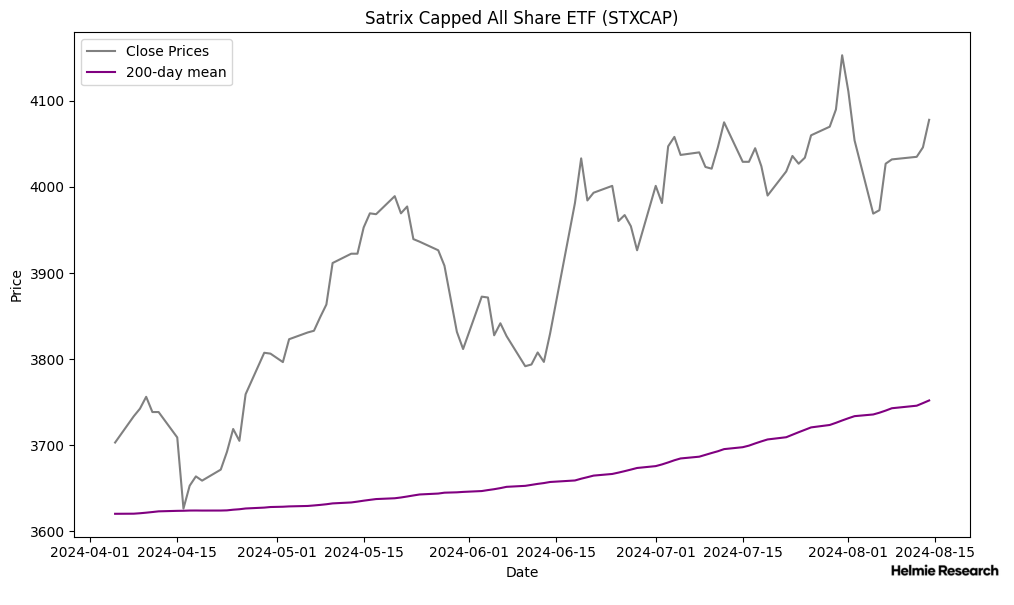

In [ ]:
%matplotlib inline

import pandas as pd
from datetime import datetime
import yfinance as yf
import yahooquery
import matplotlib.pyplot as plt
from PIL import Image

# Set length of history
#now = datetime.now().strftime("%Y-%m-%d")
#start_date = '2022-06-01'
#end_date = '2024-08-14'

# Get price history
data = yf.Ticker("STXCAP.JO")
index = data.history(start=start_date,
                     end=end_date)

# Covert Date Column to datetime
# Set Date Column as index
resetindex = index.reset_index(inplace = True)
index['Date'] = pd.to_datetime(index['Date']).dt.strftime('%Y-%m-%d')
index.set_index("Date", inplace=True)

# Save benchmark data
index.to_csv(benchmark_index)

# Read benchmark data
# Load data from CSV (replace with your actual data)
index_data = pd.read_csv(benchmark_index)  # Replace with your file

# Convert date column to datetime format
index_data['Date'] = pd.to_datetime(index_data['Date'])

# Extract relevant columns (date and close prices)
dates = index_data['Date']
close_prices = index_data['Close']

# Calculate the 200-day moving average
moving_average = close_prices.rolling(window=200).mean()

# Select the last 100 days
dates_last_100 = dates[-90:]
close_prices_last_100 = close_prices[-90:]
moving_average_last_100 = moving_average[-90:]

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(dates_last_100, close_prices_last_100, label='Close Prices', color='grey')
plt.plot(dates_last_100, moving_average_last_100, label='200-day mean', color='purple', linestyle='-')

# Customize the chart
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Satrix Capped All Share ETF (STXCAP)")
plt.xticks(rotation=0)
plt.grid(False)
plt.legend()

# Add the logo
logo_path = "/content/drive/MyDrive/-j9g8q1.jpg"  # Replace with your logo file path
logo = Image.open(logo_path)
logo.thumbnail((200, 200))  # Resize the logo to fit in the corner

# Get the current figure and add a new axes for the logo
fig = plt.gcf()
newax = fig.add_axes([0.89, 0.0, 0.12, 0.1], anchor='SE', zorder=-1)
newax.imshow(logo)
newax.axis('off')


plt.tight_layout()
plt.show()

###data.py

In [ ]:

import os
import requests
import json
import pandas as pd
import yfinance as yf
import numpy as np
from scipy import stats
from pathlib import Path

def get_tickers(api_token):
    """
    Fetches JSE stock tickers from an API and prepares them for further processing.

    Args:
        api_token (str): Your EOD Historical Data API token.

    Returns:
        list: List of JSE stock tickers with '.JO' suffix.
    """
    url = f'https://eodhd.com/api/exchange-symbol-list/JSE?api_token={api_token}&fmt=json'
    data = requests.get(url).json()

    # Serialize JSON data
    json_object = json.dumps(data, indent=4)
    with open("jse.json", "w") as outfile:
        outfile.write(json_object)

    # Read from JSON file
    with open('jse.json', 'r') as openfile:
        json_object = json.load(openfile)
    df = pd.json_normalize(json_object)

    # Create modified DataFrame
    df['tickers'] = df['Code'].astype(str) + '.JO'
    df = df[df['Code'].str.len() <= 3]

    # Extract tickers
    tickers = df['tickers'].tolist()
    return tickers

if __name__ == '__main__':
    # Example usage
    api_token = '668ec587b96b99.42475935'  # Replace with your actual API token
    tickers = get_tickers(api_token)
    print(f'JSE tickers: {tickers}')


def download_and_process(tickers, start_date, end_date, output_dir='Stocks'):
    """
    Downloads stock price data for a list of tickers, processes it to handle outliers and missing data,
    and saves the cleaned data to separate CSV files.

    Args:
        tickers (list): List of stock tickers (e.g., ['AAPL', 'MSFT', 'GOOGL']).
        start_date (str): Start date in 'YYYY-MM-DD' format.
        end_date (str): End date in 'YYYY-MM-DD' format.
        output_dir (str, optional): Directory to save CSV files. Defaults to 'Stocks'.
    """
    os.makedirs(output_dir, exist_ok=True)

    for stock in tickers:
        stock_data = yf.download(stock, start=start_date, end=end_date)
        df = pd.DataFrame(stock_data)

        # Parse the date column as datetime and set it as the index
        df['Date'] = pd.to_datetime(df.index)
        df.set_index('Date', inplace=True)

        # Select OHLCV columns
        df = df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]]

        # Remove outliers using z-score
        df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

        # Handle missing data
        df.fillna(method='ffill', inplace=True)  # Forward fill
        df.fillna(method='bfill', inplace=True)  # Backward fill

        # Save the cleaned data to a new CSV file
        csv_filename = os.path.join(output_dir, f'{stock}.csv')
        df.to_csv(csv_filename)
        print(f'Processed and saved cleaned data for {stock} to {csv_filename}')

    print(f'All data saved and processed in the "{output_dir}" directory.')

if __name__ == '__main__':
    # Example usage
    tickers = tickers
    #start_date = '2022-06-01'
    #end_date = '2024-08-14'
    download_and_process(tickers, start_date, end_date)

def save_tickers(folder_path):
    """
    Extracts unique tickers from CSV files in the specified folder.

    Args:
        folder_path (str): Path to the folder containing CSV files.

    Returns:
        pd.DataFrame: DataFrame with a single column 'tickers' containing unique tickers.
    """
    tickers = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            tickers.append(filename[:-4])

    unique_tickers = list(dict.fromkeys(tickers))
    df = pd.DataFrame(unique_tickers, columns=['tickers'])
    df.columns=df.iloc[1]
    df.to_csv(os.path.join(folder_path, 'tickers.csv'), index=False)
    print(f'Saved unique tickers to {folder_path}/tickers.csv')
    return df

if __name__ == '__main__':
    # Example usage
    folder_path = 'Stocks'
    df = save_tickers(folder_path)

[*********************100%%**********************]  1 of 1 completed

JSE tickers: ['4SI.JO', 'ABG.JO', 'ACL.JO', 'ACS.JO', 'ACT.JO', 'ADH.JO', 'ADR.JO', 'ADW.JO', 'AEG.JO', 'AEL.JO', 'AFE.JO', 'AFH.JO', 'AFT.JO', 'AGL.JO', 'AHL.JO', 'AIL.JO', 'AIP.JO', 'AME.JO', 'AMS.JO', 'ANG.JO', 'ANH.JO', 'ANI.JO', 'APF.JO', 'APH.JO', 'APN.JO', 'APO.JO', 'ARA.JO', 'ARI.JO', 'ARL.JO', 'ART.JO', 'ASC.JO', 'ATT.JO', 'AVI.JO', 'AYO.JO', 'BAT.JO', 'BAW.JO', 'BCF.JO', 'BEL.JO', 'BHG.JO', 'BID.JO', 'BIK.JO', 'BKI.JO', 'BLU.JO', 'BRN.JO', 'BRT.JO', 'BTI.JO', 'BTN.JO', 'BVT.JO', 'BWN.JO', 'BYI.JO', 'CAA.JO', 'CAT.JO', 'CFR.JO', 'CGR.JO', 'CHP.JO', 'CKS.JO', 'CLH.JO', 'CLI.JO', 'CLS.JO', 'CMH.JO', 'CML.JO', 'CMO.JO', 'CND.JO', 'COH.JO', 'CPI.JO', 'CPP.JO', 'CPR.JO', 'CRP.JO', 'CSB.JO', 'CTA.JO', 'DCP.JO', 'DIB.JO', 'DNB.JO', 'DRA.JO', 'DRD.JO', 'DSY.JO', 'DTC.JO', 'ELI.JO', 'EMH.JO', 'EMI.JO', 'EMN.JO', 'ENX.JO', 'EOH.JO', 'EPE.JO', 'EPS.JO', 'EQU.JO', 'EUZ.JO', 'EXP.JO', 'EXX.JO', 'FBR.JO', 'FFB.JO', 'FGL.JO', 'FSR.JO', 'FTA.JO', 'FTB.JO', 'FTH.JO', 'GFI.JO', 'GLD.JO', 'GLN.J


<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*******

Processed and saved cleaned data for ABG.JO to Stocks/ABG.JO.csv
Processed and saved cleaned data for ACL.JO to Stocks/ACL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for ACS.JO to Stocks/ACS.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for ACT.JO to Stocks/ACT.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for ADH.JO to Stocks/ADH.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for ADR.JO to Stocks/ADR.JO.csv
Processed and saved cleaned data for ADW.JO to Stocks/ADW.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for AEG.JO to Stocks/AEG.JO.csv
Processed and saved cleaned data for AEL.JO to Stocks/AEL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for AFE.JO to Stocks/AFE.JO.csv
Processed and saved cleaned data for AFH.JO to Stocks/AFH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for AFT.JO to Stocks/AFT.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for AGL.JO to Stocks/AGL.JO.csv
Processed and saved cleaned data for AHL.JO to Stocks/AHL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for AIL.JO to Stocks/AIL.JO.csv
Processed and saved cleaned data for AIP.JO to Stocks/AIP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for AME.JO to Stocks/AME.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for AMS.JO to Stocks/AMS.JO.csv
Processed and saved cleaned data for ANG.JO to Stocks/ANG.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for ANH.JO to Stocks/ANH.JO.csv
Processed and saved cleaned data for ANI.JO to Stocks/ANI.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for APF.JO to Stocks/APF.JO.csv
Processed and saved cleaned data for APH.JO to Stocks/APH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for APN.JO to Stocks/APN.JO.csv
Processed and saved cleaned data for APO.JO to Stocks/APO.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for ARA.JO to Stocks/ARA.JO.csv
Processed and saved cleaned data for ARI.JO to Stocks/ARI.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for ARL.JO to Stocks/ARL.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for ART.JO to Stocks/ART.JO.csv
Processed and saved cleaned data for ASC.JO to Stocks/ASC.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for ATT.JO to Stocks/ATT.JO.csv
Processed and saved cleaned data for AVI.JO to Stocks/AVI.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed


Processed and saved cleaned data for AYO.JO to Stocks/AYO.JO.csv
Processed and saved cleaned data for BAT.JO to Stocks/BAT.JO.csv


<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[********

Processed and saved cleaned data for BAW.JO to Stocks/BAW.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for BCF.JO to Stocks/BCF.JO.csv
Processed and saved cleaned data for BEL.JO to Stocks/BEL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed


Processed and saved cleaned data for BHG.JO to Stocks/BHG.JO.csv
Processed and saved cleaned data for BID.JO to Stocks/BID.JO.csv


<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[********

Processed and saved cleaned data for BIK.JO to Stocks/BIK.JO.csv
Processed and saved cleaned data for BKI.JO to Stocks/BKI.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for BLU.JO to Stocks/BLU.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for BRN.JO to Stocks/BRN.JO.csv
Processed and saved cleaned data for BRT.JO to Stocks/BRT.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for BTI.JO to Stocks/BTI.JO.csv
Processed and saved cleaned data for BTN.JO to Stocks/BTN.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for BVT.JO to Stocks/BVT.JO.csv
Processed and saved cleaned data for BWN.JO to Stocks/BWN.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for BYI.JO to Stocks/BYI.JO.csv
Processed and saved cleaned data for CAA.JO to Stocks/CAA.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for CAT.JO to Stocks/CAT.JO.csv
Processed and saved cleaned data for CFR.JO to Stocks/CFR.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for CGR.JO to Stocks/CGR.JO.csv
Processed and saved cleaned data for CHP.JO to Stocks/CHP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for CKS.JO to Stocks/CKS.JO.csv
Processed and saved cleaned data for CLH.JO to Stocks/CLH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for CLI.JO to Stocks/CLI.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for CLS.JO to Stocks/CLS.JO.csv
Processed and saved cleaned data for CMH.JO to Stocks/CMH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for CML.JO to Stocks/CML.JO.csv
Processed and saved cleaned data for CMO.JO to Stocks/CMO.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for CND.JO to Stocks/CND.JO.csv
Processed and saved cleaned data for COH.JO to Stocks/COH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for CPI.JO to Stocks/CPI.JO.csv
Processed and saved cleaned data for CPP.JO to Stocks/CPP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for CPR.JO to Stocks/CPR.JO.csv
Processed and saved cleaned data for CRP.JO to Stocks/CRP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for CSB.JO to Stocks/CSB.JO.csv
Processed and saved cleaned data for CTA.JO to Stocks/CTA.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for DCP.JO to Stocks/DCP.JO.csv
Processed and saved cleaned data for DIB.JO to Stocks/DIB.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for DNB.JO to Stocks/DNB.JO.csv
Processed and saved cleaned data for DRA.JO to Stocks/DRA.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for DRD.JO to Stocks/DRD.JO.csv
Processed and saved cleaned data for DSY.JO to Stocks/DSY.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for DTC.JO to Stocks/DTC.JO.csv
Processed and saved cleaned data for ELI.JO to Stocks/ELI.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for EMH.JO to Stocks/EMH.JO.csv
Processed and saved cleaned data for EMI.JO to Stocks/EMI.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for EMN.JO to Stocks/EMN.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for ENX.JO to Stocks/ENX.JO.csv
Processed and saved cleaned data for EOH.JO to Stocks/EOH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for EPE.JO to Stocks/EPE.JO.csv
Processed and saved cleaned data for EPS.JO to Stocks/EPS.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for EQU.JO to Stocks/EQU.JO.csv
Processed and saved cleaned data for EUZ.JO to Stocks/EUZ.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed


Processed and saved cleaned data for EXP.JO to Stocks/EXP.JO.csv


<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for EXX.JO to Stocks/EXX.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for FBR.JO to Stocks/FBR.JO.csv
Processed and saved cleaned data for FFB.JO to Stocks/FFB.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for FGL.JO to Stocks/FGL.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for FSR.JO to Stocks/FSR.JO.csv
Processed and saved cleaned data for FTA.JO to Stocks/FTA.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for FTB.JO to Stocks/FTB.JO.csv
Processed and saved cleaned data for FTH.JO to Stocks/FTH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for GFI.JO to Stocks/GFI.JO.csv
Processed and saved cleaned data for GLD.JO to Stocks/GLD.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for GLN.JO to Stocks/GLN.JO.csv
Processed and saved cleaned data for GML.JO to Stocks/GML.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for GND.JO to Stocks/GND.JO.csv
Processed and saved cleaned data for GPL.JO to Stocks/GPL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for GRT.JO to Stocks/GRT.JO.csv
Processed and saved cleaned data for GSH.JO to Stocks/GSH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for HAR.JO to Stocks/HAR.JO.csv
Processed and saved cleaned data for HCI.JO to Stocks/HCI.JO.csv

[*********************100%%**********************]  1 of 1 completed


<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for HDC.JO to Stocks/HDC.JO.csv
Processed and saved cleaned data for HIL.JO to Stocks/HIL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for HLM.JO to Stocks/HLM.JO.csv
Processed and saved cleaned data for HMN.JO to Stocks/HMN.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for HUG.JO to Stocks/HUG.JO.csv
Processed and saved cleaned data for HYP.JO to Stocks/HYP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for IMP.JO to Stocks/IMP.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for INL.JO to Stocks/INL.JO.csv
Processed and saved cleaned data for INP.JO to Stocks/INP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for ISA.JO to Stocks/ISA.JO.csv
Processed and saved cleaned data for ISB.JO to Stocks/ISB.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for ITE.JO to Stocks/ITE.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for IVT.JO to Stocks/IVT.JO.csv
Processed and saved cleaned data for JBL.JO to Stocks/JBL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for JSE.JO to Stocks/JSE.JO.csv
Processed and saved cleaned data for KAL.JO to Stocks/KAL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for KAP.JO to Stocks/KAP.JO.csv
Processed and saved cleaned data for KBO.JO to Stocks/KBO.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for KIO.JO to Stocks/KIO.JO.csv
Processed and saved cleaned data for KP2.JO to Stocks/KP2.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for KRO.JO to Stocks/KRO.JO.csv
Processed and saved cleaned data for KST.JO to Stocks/KST.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for LAB.JO to Stocks/LAB.JO.csv
Processed and saved cleaned data for LBR.JO to Stocks/LBR.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for LEW.JO to Stocks/LEW.JO.csv
Processed and saved cleaned data for LHC.JO to Stocks/LHC.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for LSK.JO to Stocks/LSK.JO.csv
Processed and saved cleaned data for LTE.JO to Stocks/LTE.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for MCG.JO to Stocks/MCG.JO.csv
Processed and saved cleaned data for MCZ.JO to Stocks/MCZ.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for MDI.JO to Stocks/MDI.JO.csv
Processed and saved cleaned data for MFL.JO to Stocks/MFL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for MHB.JO to Stocks/MHB.JO.csv
Processed and saved cleaned data for MKR.JO to Stocks/MKR.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for MMP.JO to Stocks/MMP.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for MNP.JO to Stocks/MNP.JO.csv
Processed and saved cleaned data for MPT.JO to Stocks/MPT.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
<ipython-input-10-52a0e9cea7f7>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

Processed and saved cleaned data for MRF.JO to Stocks/MRF.JO.csv
Processed and saved cleaned data for MRP.JO to Stocks/MRP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for MSP.JO to Stocks/MSP.JO.csv
Processed and saved cleaned data for MST.JO to Stocks/MST.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for MTA.JO to Stocks/MTA.JO.csv
Processed and saved cleaned data for MTH.JO to Stocks/MTH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for MTM.JO to Stocks/MTM.JO.csv
Processed and saved cleaned data for MTN.JO to Stocks/MTN.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for MTU.JO to Stocks/MTU.JO.csv
Processed and saved cleaned data for MUR.JO to Stocks/MUR.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for N91.JO to Stocks/N91.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for NCS.JO to Stocks/NCS.JO.csv
Processed and saved cleaned data for NED.JO to Stocks/NED.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for NPH.JO to Stocks/NPH.JO.csv
Processed and saved cleaned data for NPK.JO to Stocks/NPK.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed


Processed and saved cleaned data for NPN.JO to Stocks/NPN.JO.csv


<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for NRP.JO to Stocks/NRP.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for NTC.JO to Stocks/NTC.JO.csv
Processed and saved cleaned data for NVS.JO to Stocks/NVS.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for NWL.JO to Stocks/NWL.JO.csv
Processed and saved cleaned data for NY1.JO to Stocks/NY1.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for OAO.JO to Stocks/OAO.JO.csv
Processed and saved cleaned data for OAS.JO to Stocks/OAS.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for OCE.JO to Stocks/OCE.JO.csv
Processed and saved cleaned data for OCT.JO to Stocks/OCT.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for OMN.JO to Stocks/OMN.JO.csv
Processed and saved cleaned data for OMU.JO to Stocks/OMU.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for ORN.JO to Stocks/ORN.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for OUT.JO to Stocks/OUT.JO.csv
Processed and saved cleaned data for PAN.JO to Stocks/PAN.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed


Processed and saved cleaned data for PBG.JO to Stocks/PBG.JO.csv


<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for PIK.JO to Stocks/PIK.JO.csv
Processed and saved cleaned data for PMR.JO to Stocks/PMR.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for PMV.JO to Stocks/PMV.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for PPC.JO to Stocks/PPC.JO.csv
Processed and saved cleaned data for PPE.JO to Stocks/PPE.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for PPH.JO to Stocks/PPH.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for PPR.JO to Stocks/PPR.JO.csv
Processed and saved cleaned data for PRX.JO to Stocks/PRX.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for QFH.JO to Stocks/QFH.JO.csv
Processed and saved cleaned data for QLT.JO to Stocks/QLT.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for RBX.JO to Stocks/RBX.JO.csv
Processed and saved cleaned data for RCL.JO to Stocks/RCL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for RDF.JO to Stocks/RDF.JO.csv
Processed and saved cleaned data for REA.JO to Stocks/REA.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for REB.JO to Stocks/REB.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for REM.JO to Stocks/REM.JO.csv
Processed and saved cleaned data for REN.JO to Stocks/REN.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for RES.JO to Stocks/RES.JO.csv
Processed and saved cleaned data for RFG.JO to Stocks/RFG.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for RHB.JO to Stocks/RHB.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for RLO.JO to Stocks/RLO.JO.csv
Processed and saved cleaned data for RMH.JO to Stocks/RMH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for RNG.JO to Stocks/RNG.JO.csv
Processed and saved cleaned data for RNI.JO to Stocks/RNI.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for RTN.JO to Stocks/RTN.JO.csv
Processed and saved cleaned data for RTO.JO to Stocks/RTO.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for S32.JO to Stocks/S32.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for SAC.JO to Stocks/SAC.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SAP.JO to Stocks/SAP.JO.csv
Processed and saved cleaned data for SAR.JO to Stocks/SAR.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for SBK.JO to Stocks/SBK.JO.csv
Processed and saved cleaned data for SBP.JO to Stocks/SBP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for SCD.JO to Stocks/SCD.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SDL.JO to Stocks/SDL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for SDO.JO to Stocks/SDO.JO.csv
Processed and saved cleaned data for SEA.JO to Stocks/SEA.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*******

Processed and saved cleaned data for SEB.JO to Stocks/SEB.JO.csv
Processed and saved cleaned data for SEP.JO to Stocks/SEP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed


Processed and saved cleaned data for SFN.JO to Stocks/SFN.JO.csv


<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for SHC.JO to Stocks/SHC.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SHG.JO to Stocks/SHG.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for SHP.JO to Stocks/SHP.JO.csv
Processed and saved cleaned data for SLG.JO to Stocks/SLG.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SLM.JO to Stocks/SLM.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for SNT.JO to Stocks/SNT.JO.csv
Processed and saved cleaned data for SNV.JO to Stocks/SNV.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SOH.JO to Stocks/SOH.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


Processed and saved cleaned data for SOL.JO to Stocks/SOL.JO.csv
Processed and saved cleaned data for SPG.JO to Stocks/SPG.JO.csv


<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead

Processed and saved cleaned data for SPP.JO to Stocks/SPP.JO.csv
Processed and saved cleaned data for SRE.JO to Stocks/SRE.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed


Processed and saved cleaned data for SSK.JO to Stocks/SSK.JO.csv


<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SSS.JO to Stocks/SSS.JO.csv
Processed and saved cleaned data for SSU.JO to Stocks/SSU.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for SSW.JO to Stocks/SSW.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for SUI.JO to Stocks/SUI.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for SUR.JO to Stocks/SUR.JO.csv
Processed and saved cleaned data for SXM.JO to Stocks/SXM.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed


Processed and saved cleaned data for SYG.JO to Stocks/SYG.JO.csv
Processed and saved cleaned data for SZK.JO to Stocks/SZK.JO.csv


<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[********

Processed and saved cleaned data for TBS.JO to Stocks/TBS.JO.csv
Processed and saved cleaned data for TCP.JO to Stocks/TCP.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for TEX.JO to Stocks/TEX.JO.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for TFG.JO to Stocks/TFG.JO.csv
Processed and saved cleaned data for TGA.JO to Stocks/TGA.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for THA.JO to Stocks/THA.JO.csv
Processed and saved cleaned data for TKG.JO to Stocks/TKG.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed


Processed and saved cleaned data for TLM.JO to Stocks/TLM.JO.csv


<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for TMT.JO to Stocks/TMT.JO.csv
Processed and saved cleaned data for TON.JO to Stocks/TON.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for TPC.JO to Stocks/TPC.JO.csv
Processed and saved cleaned data for TRE.JO to Stocks/TRE.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for TRL.JO to Stocks/TRL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for TRU.JO to Stocks/TRU.JO.csv
Processed and saved cleaned data for TSG.JO to Stocks/TSG.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for TTO.JO to Stocks/TTO.JO.csv
Processed and saved cleaned data for UPL.JO to Stocks/UPL.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for VIS.JO to Stocks/VIS.JO.csv
Processed and saved cleaned data for VKE.JO to Stocks/VKE.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for VOD.JO to Stocks/VOD.JO.csv
Processed and saved cleaned data for VUN.JO to Stocks/VUN.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed


Processed and saved cleaned data for WBC.JO to Stocks/WBC.JO.csv


<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


Processed and saved cleaned data for WBO.JO to Stocks/WBO.JO.csv
Processed and saved cleaned data for WEZ.JO to Stocks/WEZ.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for WHL.JO to Stocks/WHL.JO.csv
Processed and saved cleaned data for WKF.JO to Stocks/WKF.JO.csv


[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill
[*********************100%%**********************]  1 of 1 completed
<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

Processed and saved cleaned data for YRK.JO to Stocks/YRK.JO.csv
Processed and saved cleaned data for ZED.JO to Stocks/ZED.JO.csv


[*********************100%%**********************]  1 of 1 completed

Processed and saved cleaned data for ZZD.JO to Stocks/ZZD.JO.csv
All data saved and processed in the "Stocks" directory.
Saved unique tickers to Stocks/tickers.csv



<ipython-input-10-52a0e9cea7f7>:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-10-52a0e9cea7f7>:77: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill


In [ ]:

import os
import glob

# Specify the path to the directory
path = '/content/drive/MyDrive/Stocks'

# Specify the file to exclude
exclude_file = 'tickers.csv'

# Use glob to find all CSV files in the directory
csv_files = glob.glob(os.path.join(path, '*.csv'))

# Filter out the specific file
csv_files = [file for file in csv_files if os.path.basename(file) != exclude_file]

# Count the number of CSV files
csv_count = len(csv_files)

print(f'There are {csv_count} CSV files in the folder, excluding {exclude_file}.')

There are 263 CSV files in the folder, excluding tickers.csv.


###ranker.py

In [10]:

import os
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.stats import linregress

#Make a variable for this is Settings

#ranking_day = '2024-08-13'


# Define the directory containing the CSV files
data_dir = '/content/drive/MyDrive/Stocks'

# Read tickers from the 'tickers.csv' file
tickers_df = pd.read_csv(os.path.join(data_dir, 'tickers.csv'), header=None)
tickers = tickers_df[0].tolist()

# Create a dictionary to store stock data
stock_data = {}
for ticker in tickers:
    stock_data[ticker] = pd.read_csv(os.path.join(data_dir, f"{ticker}.csv"),
                                     parse_dates=True, index_col=0)['Close']

# Create a DataFrame from the dictionary
stocks = pd.DataFrame(stock_data)

# Remove duplicate columns
stocks = stocks.loc[:, ~stocks.columns.duplicated()]

# Calculate momentum
def momentum(closes):
    log_returns = np.log(closes)
    x = np.arange(len(log_returns))
    # Use linregress for consistency with previous code and to get rvalue
    slope, _, rvalue, _, _ = linregress(x, log_returns)
    annualized_slope = (1 + slope) ** 252
    momentum_score = annualized_slope * (rvalue ** 2)
    return momentum_score

momentums = stocks.copy(deep=True)
for ticker in tickers:
    momentums[ticker] = stocks[ticker].rolling(90).apply(momentum, raw=False)

# Rank stocks by momentum - sort by the values in the dataframe on the date provided in the 'ranking_day' variable
result = momentums.sort_values(by=momentums.index[-1], axis=1, ascending=False)
# Filter the result to only include rows where the date index is greater than or equal to the ranking day
res = result[~(result.index < pd.to_datetime(ranking_day))].dropna(axis=1)

# Reset the index to make 'Date' a column # This is the key change
res = res.reset_index()

# Prepare DataFrame for final results
# Use the tickers list as the value_vars since they are now columns in the DataFrame
finalframe = res.melt(id_vars=['Date'], value_vars=res.columns[1:], var_name='symbol', value_name='momentum_score')
finalframe['momentum_score'] = finalframe['momentum_score'].astype(float)
finalframe['rank'] = finalframe['momentum_score'].rank(ascending=False)

# Filter out rows with momentum score < 0.001
finalframe = finalframe[finalframe['momentum_score'] >= 0.001]

# Reset the index
finalframe.reset_index(drop=True, inplace=True)

# Filter out low-ranked stocks (rank >= 50)
finalframe = finalframe[finalframe['rank'] < 50]

# Function to get company name from ticker
def get_company_name(ticker):
    try:
        stock = yf.Ticker(ticker)
        return stock.info['longName']
    except KeyError:
        return None

# Add a new column with company names
finalframe['company'] = finalframe['symbol'].apply(get_company_name)

finalframe = finalframe.iloc[:, [0,4,1,2,3]]
finalframe = finalframe.sort_values(by='rank')
finalframe.to_csv('/content/drive/MyDrive/ranking_list.csv')

###metrics.py

In [16]:

import os
import pandas as pd
import numpy as np

def calculate_metrics_and_add_columns(original_df, data_folder, portfolio_value):
    """
    Calculates 20-day volatility, 100-day mean, and 90-day rate of return for each stock
    and adds the results as columns to the original DataFrame.

    Args:
        original_df (pd.DataFrame): Original DataFrame with columns 'Date', 'symbol', 'rank', 'momentum_score'.
        data_folder (str): Path to the folder containing stock data CSV files.
        portfolio_value (float): Total value of the portfolio.

    Returns:
        pd.DataFrame: Updated DataFrame with additional columns.
    """
    result_df = original_df.copy()  # Create a copy to avoid modifying the original DataFrame

    result_df['Date'] = pd.to_datetime(result_df['Date'])

    # Loop through each ticker in the DataFrame
    for ticker in result_df['symbol']:
        filepath = os.path.join(data_folder, f"{ticker}.csv")

        # Read CSV data (adjust column names as needed)
        stock_data = pd.read_csv(filepath, parse_dates=['Date'], index_col='Date')

        # Calculate daily returns
        stock_data['daily_return'] = stock_data['Close'].pct_change()

        # Compute 20-day volatility
        stock_data['20_day_volatility'] = stock_data['daily_return'].rolling(window=20).std() * np.sqrt(20)

        # Compute 100-day mean
        stock_data['100_day_mean'] = stock_data['Close'].rolling(window=100).mean()

        # Compute 90-day rate of return
        stock_data['90_day_return'] = (stock_data['Close'].pct_change(periods=90) + 1).pow(1 / 90) - 1

        # Ensure the date exists in stock_data
        if ranking_day in stock_data.index:
            # Add the calculated values to the result_df
            result_df.loc[result_df['symbol'] == ticker, ['20_day_volatility', '100_day_mean', '90_day_return']] = \
                stock_data.loc[ranking_day, ['20_day_volatility', '100_day_mean', '90_day_return']].values

            # Add the 'close' column
            result_df.loc[result_df['symbol'] == ticker, 'Close'] = stock_data.loc[ranking_day, 'Close']

    # Replace any remaining NaN values in '20_day_volatility' with a small number to avoid division by zero
    result_df['20_day_volatility'].replace(0, np.nan, inplace=True)
    result_df['20_day_volatility'].fillna(1e-10, inplace=True)

    # Calculate inverse volatility
    inv_vol = 1 / result_df["20_day_volatility"]
    sum_inv_vol = inv_vol.sum()
    vol_targets = inv_vol / sum_inv_vol
    result_df["weight"] = vol_targets

    # Add a boolean column indicating if close > 100_day_mean
    result_df['stock_trend'] = result_df['Close'] > result_df['100_day_mean']

    # Read index data from a CSV file (adjust filename and column names)
    index_data = pd.read_csv(benchmark_index, parse_dates=['Date'], index_col='Date')

    # Calculate 200-day SMA for the index
    index_data['index_mean'] = index_data['Close'].rolling(window=200).mean()

    # Add a boolean column indicating if close > 200-day_mean
    index_data['market_trend'] = index_data['Close'] > index_data['index_mean']


    # Calculate position weight
    stockprice = result_df["Close"] / 100
    pos_weight = portfolio_value * result_df["weight"]
    result_df["units"] = pos_weight / stockprice
    result_df["ZAR"] = stockprice * result_df["units"]

    # Merge index data with result_df based on date (adjust column names)
    merged_df = pd.merge(result_df,
                         index_data[['index_mean', 'market_trend']],
                         left_on='Date',
                         right_index=True,
                         how='left')

    merged_df.to_csv(ranked_list)

    # Drop rows where boolean value is False and '90_day_return' >= 0.15
    merged_df = merged_df.drop(merged_df[(merged_df['stock_trend'] == False) |
                                         (merged_df['90_day_return'] >= 0.15)].index)

    merged_df = merged_df.loc[:, ~merged_df.columns.str.contains('^Unnamed')]

    merged_df = merged_df.iloc[:, [0, 1, 2, 3, 4, 8, 5, 7, 6, 13, 10, 14, 9, 11, 12]]

    merged_df.to_csv(initial_portfolio)


    return merged_df

# Example usage:
original_df = pd.read_csv(ranking_list)  # Replace with your actual data
data_folder = Data # Path to your stock data folder
#portfolio_value = 148700.00  # Example portfolio value

updated_df = calculate_metrics_and_add_columns(original_df, data_folder, portfolio_value)

# Display the merged DataFrame
updated_df

,Date,company,symbol,momentum_score,rank,Close,20_day_volatility,90_day_return,100_day_mean,index_mean,stock_trend,market_trend,weight,units,ZAR
0,2024-08-14,Nictus Limited,NCS.JO,1744.945887,1.0,80.0,0.066667,0.002310,57.8505,3751.93093,True,True,0.025358,4713.494083,3770.795266
1,2024-08-14,The Foschini Group Limited,TFG.JO,2.716209,2.0,13144.0,0.054692,0.003156,11321.3300,3751.93093,True,True,0.030911,34.969715,4596.419398
2,2024-08-14,Wilson Bayly Holmes-Ovcon Limited,WBO.JO,2.656110,3.0,18326.0,0.055980,0.003509,15444.4400,3751.93093,True,True,0.030199,24.504276,4490.653550
3,2024-08-14,The SPAR Group Ltd,SPP.JO,2.250935,4.0,12278.0,0.055927,0.002996,10686.0000,3751.93093,True,True,0.030228,36.609135,4494.869543
4,2024-08-14,Mr Price Group Limited,MRP.JO,2.140414,5.0,22056.0,0.048945,0.002963,18908.3900,3751.93093,True,True,0.034540,23.286861,5136.149965
5,2024-08-14,Grindrod Limited,GND.JO,1.763600,6.0,1543.0,0.037366,0.002166,1404.8600,3751.93093,True,True,0.045243,436.012102,6727.666736
6,2024-08-14,Frontier Transport Holdings Limited,FTH.JO,1.688734,7.0,721.0,0.127479,0.001325,675.3300,3751.93093,True,True,0.013261,273.505549,1971.975007
7,2024-08-14,Tharisa plc,THA.JO,1.633547,8.0,1900.0,0.145788,0.002817,1748.7800,3751.93093,True,True,0.011596,90.753836,1724.322885
8,2024-08-14,York Timber Holdings Limited,YRK.JO,1.578587,9.0,212.0,0.117182,0.002993,180.3900,3751.93093,True,True,0.014427,1011.918342,2145.266885
9,2024-08-14,Truworths International Limited,TRU.JO,1.575724,10.0,9062.0,0.071716,0.002128,8295.4100,3751.93093,True,True,0.023573,38.681187,3505.289138


<ipython-input-12-ca9e875d0cf3>:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


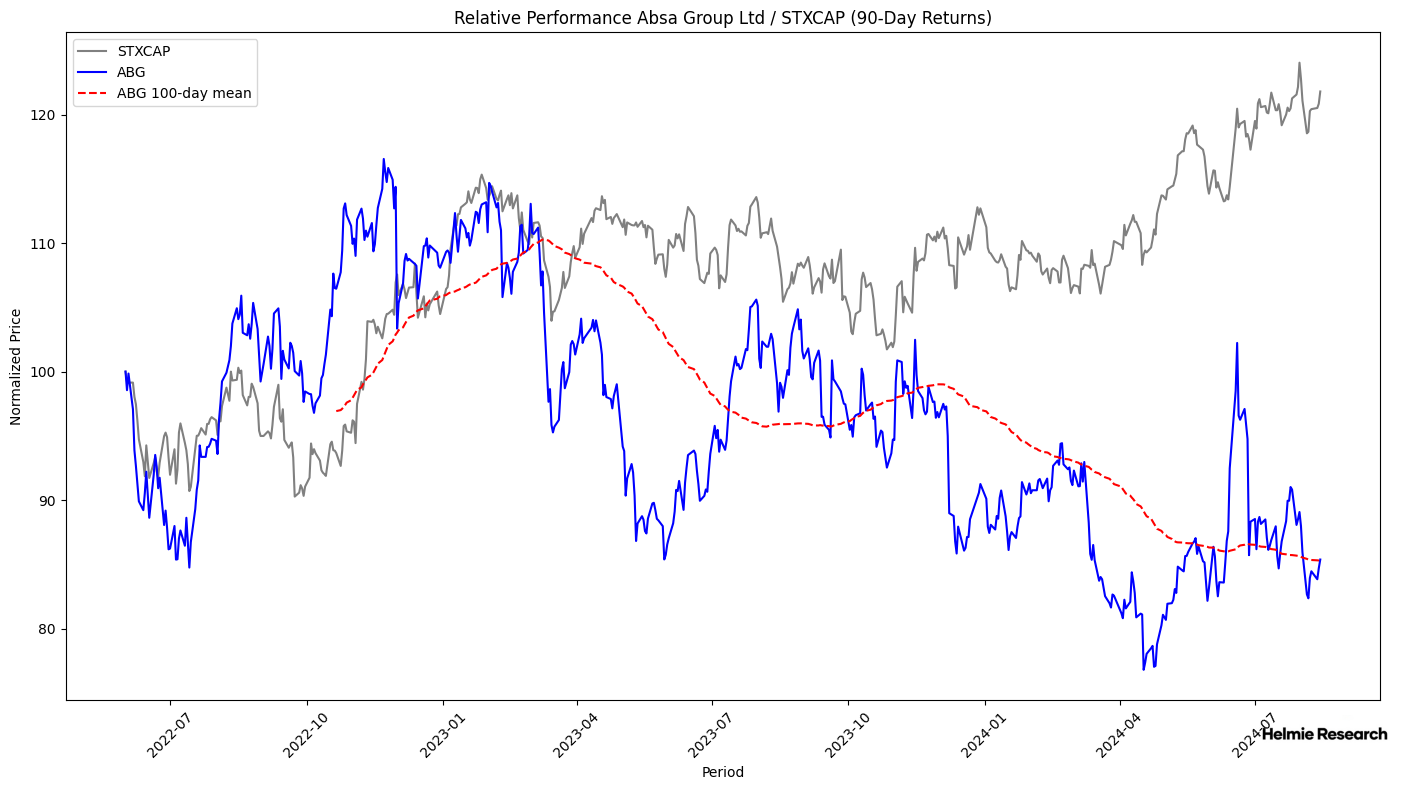

In [12]:

import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Load the first dataset
stock1 = pd.read_csv("/content/drive/MyDrive/STX.csv")  # Replace with your file
stock1['Date'] = pd.to_datetime(stock1['Date'])
stock1.set_index('Date', inplace=True)

# Load the second dataset
stock2 = pd.read_csv("/content/drive/MyDrive/Stocks/ABG.JO.csv")  # Replace with your file
stock2['Date'] = pd.to_datetime(stock2['Date'])
stock2.set_index('Date', inplace=True)

# Find the common date range
common_dates = stock1.index.intersection(stock2.index)

# Restrict both datasets to the common date range
stock1 = stock1.loc[common_dates]
stock2 = stock2.loc[common_dates]

# Normalize both datasets based on their initial values at the common starting date
stock1['Normalized'] = stock1['Close'] / stock1['Close'].iloc[0] * 100
#stock1['200-day MA'] = stock1['Close'].rolling(window=200).mean() / stock1['Close'].iloc[0] * 100
stock2['Normalized'] = stock2['Close'] / stock2['Close'].iloc[0] * 100
stock2['100-day MA'] = stock2['Close'].rolling(window=100).mean() / stock2['Close'].iloc[0] * 100

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(stock1.index, stock1['Normalized'], label='STXCAP', color='grey')
#plt.plot(stock1.index, stock1['200-day MA'], label='STXCAP 200-day mean', color='black', linestyle='-')
plt.plot(stock2.index, stock2['Normalized'], label='ABG', color='blue')
plt.plot(stock2.index, stock2['100-day MA'], label='ABG 100-day mean', color='red', linestyle='--')

# Customize the chart
plt.xlabel("Period")
plt.ylabel("Normalized Price")
plt.title("Relative Performance Absa Group Ltd / STXCAP (90-Day Returns)")
plt.xticks(rotation=45)
plt.grid(False)
plt.legend()

# Add the logo
logo_path = "/content/drive/MyDrive/-j9g8q1.jpg"  # Replace with your logo file path
logo = Image.open(logo_path)
logo.thumbnail((5000, 5000))  # Resize the logo to fit in the corner

# Get the current figure and add a new axes for the logo
fig = plt.gcf()
newax = fig.add_axes([0.90, 0.0, 0.1, 0.1], anchor='NW', zorder=-1)
newax.imshow(logo)
newax.axis('off')

plt.tight_layout()
plt.show()

In [13]:
print (updated_df['weight'].sum())
print (updated_df['units'].sum())
print (updated_df['ZAR'].sum())

0.7669053368227419
27434.934312398767
114038.82358554173


###Portfolio Rebalance Function

In [17]:

import pandas as pd

# Read the CSV file into a DataFrame
filename = initial_portfolio
cols = ['symbol', 'stock_trend', '90_day_return']
df = pd.read_csv(filename, usecols=cols)

# Convert the DataFrame to a dictionary
data_ranking = df.to_dict(orient='list')

current_ranking_table = pd.DataFrame(data_ranking)

# Read the CSV file into a DataFrame
filename2 = current_portfolio
cols2 = ['symbol', 'company', 'stock_trend', '90_day_return']
df2 = pd.read_csv(filename2, usecols=cols2)

# Convert the DataFrame to a dictionary
data_portfolio = df2.to_dict(orient='list')

cpf = pd.DataFrame(data_portfolio)

# Identify stocks to sell based on stock trend
sell_list = current_ranking_table[~current_ranking_table["stock_trend"]]

# Drop stocks with a 90-day return greater than or equal to 15%
index_names1 = current_ranking_table[(current_ranking_table["90_day_return"] >= 15)].index
current_ranking_table.drop(index_names1, inplace=True)

# List of disqualified tickers
dqs = sell_list["symbol"].tolist()

# Identify stocks to liquidate
liquidate = cpf.loc[cpf['symbol'].isin(dqs)].reset_index(drop=True)

# Remove disqualified stocks from the portfolio
newpf = cpf[~cpf['symbol'].isin(liquidate['symbol'])]

# Remove stocks that are not in the current ranking table
ineligible = newpf[~newpf['symbol'].isin(current_ranking_table['symbol'])]

# Get tickers to remove
remove = ineligible['symbol'].tolist()

# Create a new portfolio without removed stocks
rebalanced = newpf[~newpf['symbol'].isin(ineligible['symbol'])]

# Get symbols for rebalancing
rebalance = rebalanced["symbol"].tolist()


# Identify qualified stocks to buy (in current ranking table but not in cpf)
qualified_to_buy = current_ranking_table[~current_ranking_table['symbol'].isin(cpf['symbol'])]

# Remove duplicates from the qualified_to_buy list
qualified_to_buy_unique = list(set(qualified_to_buy['symbol']))

updated_list = rebalance + qualified_to_buy_unique

selldf = pd.read_csv(current_portfolio)


# Drop rows where 'Name' is not in the list
sell = selldf[selldf['symbol'].isin(remove)]
#sell = sell.iloc[::]
sell = sell.drop(columns=['Unnamed: 0'])

# Print relevant information
print(f"Sell these stocks:{sell['company']}")
print(f"Sell declining stocks: {liquidate['symbol'].tolist()}")
#print(f"Sell disqualified stocks: {ineligible['symbol'].tolist()}")
print(f"Portfolio after rebalance: {rebalanced['symbol'].tolist()}")
print(f"Portfolio after position rebalance: {updated_list}")
print(f"Buy these securities: {qualified_to_buy_unique}")

Sell these stocks:Series([], Name: company, dtype: object)
Sell declining stocks: []
Portfolio after rebalance: ['NCS.JO', 'TFG.JO', 'WBO.JO', 'SPP.JO', 'MRP.JO', 'GND.JO', 'FTH.JO', 'THA.JO', 'YRK.JO', 'TRU.JO', 'GRT.JO', 'RNG.JO', 'OUT.JO', 'CKS.JO', 'CAA.JO', 'KAL.JO', 'TRL.JO', 'ANG.JO', 'SNV.JO', 'TEX.JO', 'TBS.JO', 'MSP.JO', 'CHP.JO', 'DCP.JO', 'TPC.JO', 'KAP.JO', 'MHB.JO', 'ABG.JO', 'LSK.JO', 'HCI.JO', 'GPL.JO', 'RMH.JO', 'SUI.JO', 'ADR.JO', 'GSH.JO']
Portfolio after position rebalance: ['NCS.JO', 'TFG.JO', 'WBO.JO', 'SPP.JO', 'MRP.JO', 'GND.JO', 'FTH.JO', 'THA.JO', 'YRK.JO', 'TRU.JO', 'GRT.JO', 'RNG.JO', 'OUT.JO', 'CKS.JO', 'CAA.JO', 'KAL.JO', 'TRL.JO', 'ANG.JO', 'SNV.JO', 'TEX.JO', 'TBS.JO', 'MSP.JO', 'CHP.JO', 'DCP.JO', 'TPC.JO', 'KAP.JO', 'MHB.JO', 'ABG.JO', 'LSK.JO', 'HCI.JO', 'GPL.JO', 'RMH.JO', 'SUI.JO', 'ADR.JO', 'GSH.JO']
Buy these securities: []


###Securities rebalance function

In [18]:
# Calculate position weight

new_portfolio_value = 149079.42

mypf = pd.read_csv(initial_portfolio)

stockprice2 = mypf["Close"]
new_pos_weight = new_portfolio_value * mypf["weight"]
mypf["units"] = new_pos_weight / stockprice2
mypf["ZAR"] = stockprice2 * mypf["units"]
# Drop columns by index
mypf = mypf.drop(mypf.columns[[0]], axis=1)


oldpf = pd.read_csv(current_portfolio)

# Drop rows where 'Name' is not in the list
filtered = oldpf[~oldpf['symbol'].isin(remove)]
filtered = filtered.iloc[0::]
#filtered =filtered.drop(columns=['Unnamed: 0'])

name_list = filtered['symbol'].tolist()


# Round the values in column 'A' to 2 decimal places
filtered['units'] = filtered['units'].round(2)

filtered.reset_index(inplace=True)
filtered.set_index('Date')


# Drop rows where 'Name' is not in the list
rb = mypf[mypf['symbol'].isin(rebalance)]
rb = rb.iloc[0::]
#rb =rb.drop(columns=['Unnamed: 0'])

# Round the values in column 'A' to 2 decimal places
rb['units'] = rb['units'].round(2)

#rb.reset_index(inplace=True)
rb.set_index('Date')


# Reindex the DataFrame
df_reindexed = rb.set_index('symbol').reindex(name_list).reset_index()

df_reindexed["buy/sell"] = df_reindexed["units"] - filtered["units"]
df_reindexed.set_index('Date', inplace=True)

print(f"Rebalance positions:{df_reindexed[['symbol','buy/sell', 'company']]}")

Rebalance positions:            symbol  buy/sell                                  company
Date                                                                 
2024-08-14  NCS.JO  -4666.23                           Nictus Limited
2024-08-14  TFG.JO    -34.62               The Foschini Group Limited
2024-08-14  WBO.JO    -24.25        Wilson Bayly Holmes-Ovcon Limited
2024-08-14  SPP.JO    -36.24                       The SPAR Group Ltd
2024-08-14  MRP.JO    -23.06                   Mr Price Group Limited
2024-08-14  GND.JO   -431.64                         Grindrod Limited
2024-08-14  FTH.JO   -270.77      Frontier Transport Holdings Limited
2024-08-14  THA.JO    -89.84                              Tharisa plc
2024-08-14  YRK.JO  -1001.77             York Timber Holdings Limited
2024-08-14  TRU.JO    -38.29          Truworths International Limited
2024-08-14  GRT.JO   -375.84           Growthpoint Properties Limited
2024-08-14  RNG.JO   -605.54   Randgold & Exploration Company Limited


###Enter new positions

In [19]:

# Drop rows where 'Name' is not in the list
buy = mypf[mypf['symbol'].isin(qualified_to_buy_unique)]
buy = buy.iloc[0::]

print(f"Buy securities:{buy[['symbol', 'ZAR', 'company']]}") # Use square brackets to select columns
# Concatenate along rows (axis=0)
result = pd.concat([buy, rb], axis=0)

print(f"New Portfolio:{result[['symbol','weight', 'company']]}")
print(f"Portfolio Value:{new_portfolio_value}")
print(f"Equity:{result['ZAR'].sum()}")
print(f"Cash:{new_portfolio_value - result['ZAR'].sum()}")
print(f"Total Weights:{result['weight'].sum()}")
print(f"Units:{result['units'].sum()}")

Buy securities:Empty DataFrame
Columns: [symbol, ZAR, company]
Index: []
New Portfolio:    symbol    weight                                  company
0   NCS.JO  0.025358                           Nictus Limited
1   TFG.JO  0.030911               The Foschini Group Limited
2   WBO.JO  0.030199        Wilson Bayly Holmes-Ovcon Limited
3   SPP.JO  0.030228                       The SPAR Group Ltd
4   MRP.JO  0.034540                   Mr Price Group Limited
5   GND.JO  0.045243                         Grindrod Limited
6   FTH.JO  0.013261      Frontier Transport Holdings Limited
7   THA.JO  0.011596                              Tharisa plc
8   YRK.JO  0.014427             York Timber Holdings Limited
9   TRU.JO  0.023573          Truworths International Limited
10  GRT.JO  0.033573           Growthpoint Properties Limited
11  RNG.JO  0.003743   Randgold & Exploration Company Limited
12  OUT.JO  0.037549                 OUTsurance Group Limited
13  CKS.JO  0.014735                 Crookes 

###Save Portfolio data to disc

In [24]:
result.head(2)

,Date,company,symbol,momentum_score,rank,Close,20_day_volatility,90_day_return,100_day_mean,index_mean,stock_trend,market_trend,weight,units,ZAR
0,2024-08-14,Nictus Limited,NCS.JO,1744.945887,1.0,80.0,0.066667,0.002310,57.8505,3751.93093,True,True,0.025358,47.26,3780.416753
1,2024-08-14,The Foschini Group Limited,TFG.JO,2.716209,2.0,13144.0,0.054692,0.003156,11321.3300,3751.93093,True,True,0.030911,0.35,4608.147531


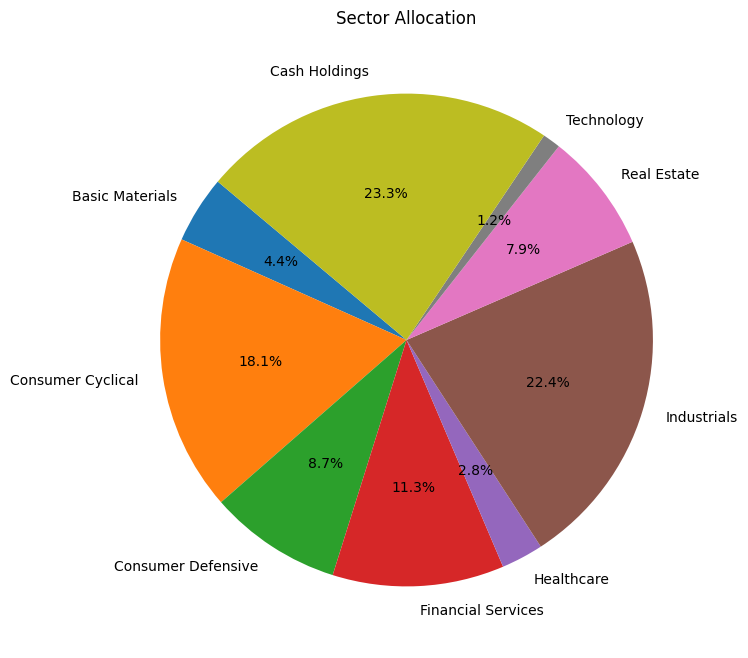

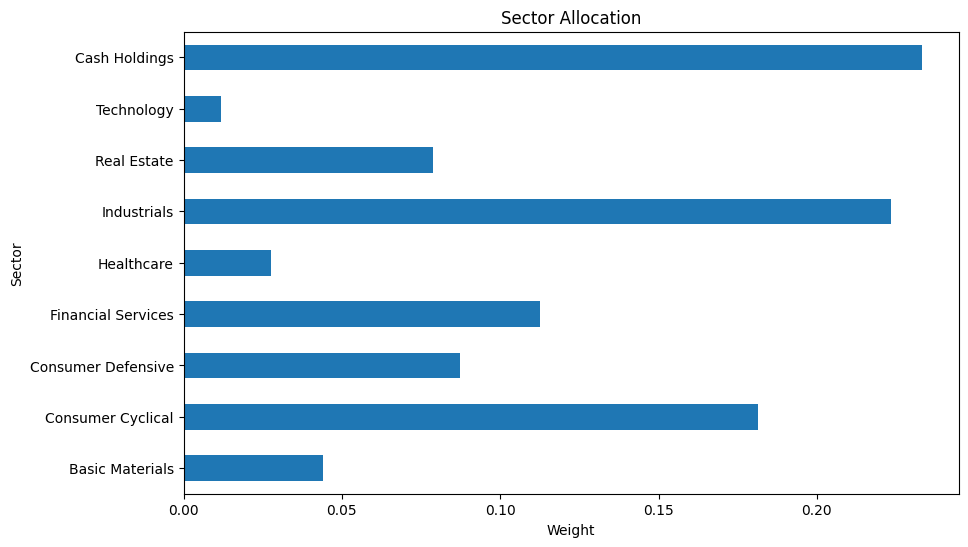

In [35]:

import pandas as pd
import yfinance as yf
"""

# Sample DataFrame with the specified columns
data = {
    'Date': ['2023-08-14', '2023-08-14', '2023-08-14', '2023-08-14'],
    'symbols': ['AAPL', 'MSFT', 'GOOGL', 'AMZN'],
    'company': ['Apple Inc.', 'Microsoft Corp.', 'Alphabet Inc.', 'Amazon.com Inc.'],
    'Close': [150.00, 280.00, 2700.00, 3400.00]
}
df = pd.DataFrame(data)
"""
# Function to get industry information
def get_sector(ticker):
    try:
        stock = yf.Ticker(ticker)
        return stock.info.get('sector', 'Unknown')
    except Exception as e:
        return 'Unknown'

# Add a new column 'Industry' to the DataFrame
result['Sector'] = result['symbol'].apply(get_sector)

# Calculate the total weight and the weight of Cash holdings
total_weight = result['weight'].sum()
cash_weight = 1 - total_weight

# Group by industry and sum the weights
sector_weights = result.groupby('Sector')['weight'].sum()

# Add Cash holdings to the industry weights
sector_weights['Cash Holdings'] = cash_weight

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sector_weights, labels=sector_weights.index, autopct='%1.1f%%', startangle=140)
plt.title('Sector Allocation')
plt.show()

# Create a bar chart with custom labels
plt.figure(figsize=(10, 6))
sector_weights.plot(kind='barh')
plt.title('Sector Allocation')
plt.xlabel('Weight')
plt.ylabel('Sector')
plt.show()

In [36]:

pip install dataframe_image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 16.8 MB/s eta 0:00:00


In [37]:

import pandas as pd
import dataframe_image as dfi

# Sample DataFrame with multiple columns
data = {
    'Date': ['2023-08-14', '2023-08-14', '2023-08-14', '2023-08-14'],
    'symbols': ['AAPL', 'MSFT', 'GOOGL', 'AMZN'],
    'company': ['Apple Inc.', 'Microsoft Corp.', 'Alphabet Inc.', 'Amazon.com Inc.'],
    'Close': [150.00, 280.00, 2700.00, 3400.00],
    'Weight': [0.25, 0.30, 0.20, 0.15]  # Example weights
}
df = pd.DataFrame(data)

# Select the columns you want to save
selected_columns = df[['Date', 'symbols', 'company', 'Weight']]

# Save the selected columns as a PNG file
dfi.export(selected_columns, 'selected_columns.png')

OSError: Chrome executable not able to be found on your machine